In [11]:
#@title Insere a WebCam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


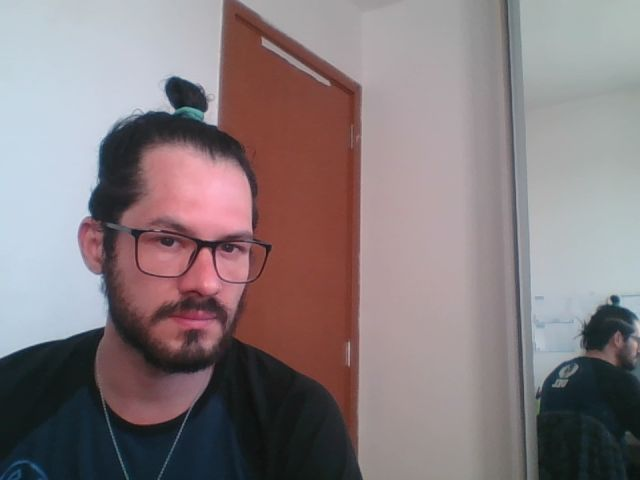

In [16]:
#@title Realiza a captura das imagens
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

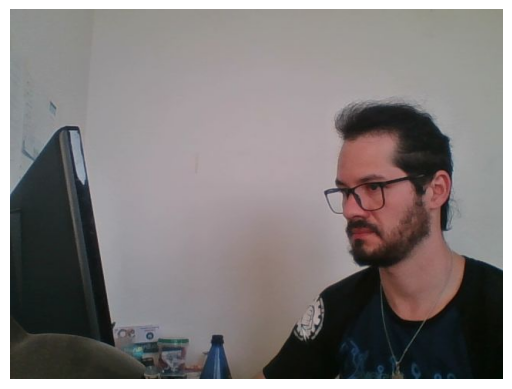

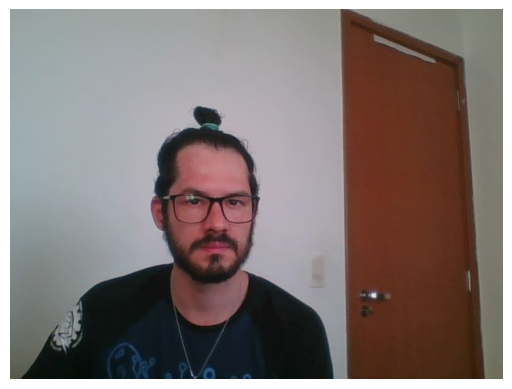

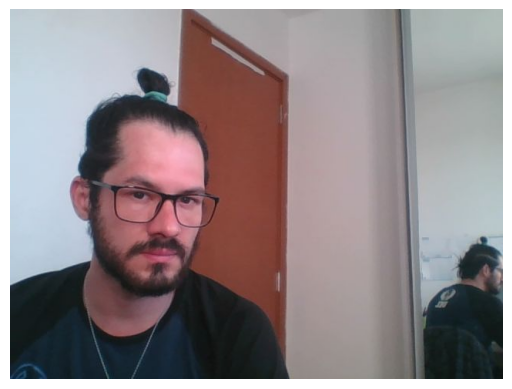

In [1]:
#@title Imagens Originais
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Carrega a imagem
img1A = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto1.jpeg', 1)
img1B = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto2.jpeg', 1)
img1C = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto3.jpeg', 1)

# Exibe as imagens originais sem escala e sem título
plt.imshow(cv.cvtColor(img1A, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv.cvtColor(img1B, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv.cvtColor(img1C, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

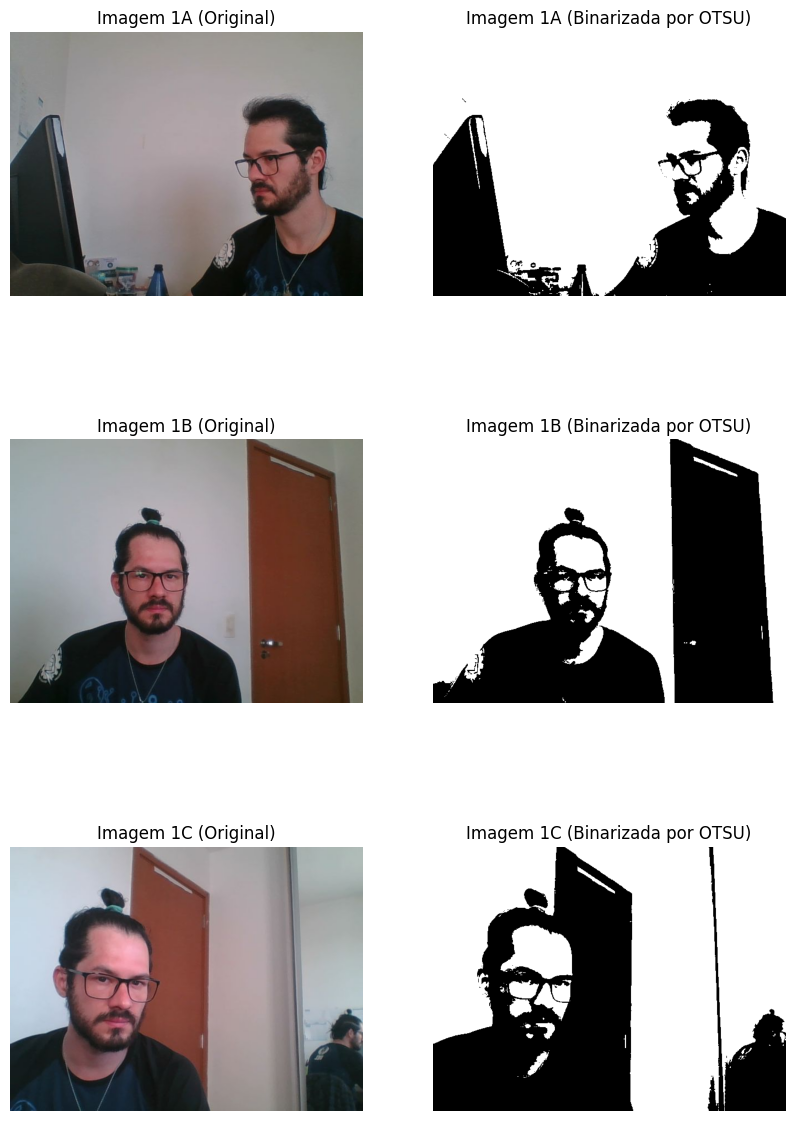

In [3]:
#@title Binarização por OTSU
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Carrega as imagens
img1A = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto1.jpeg', 1)
img1B = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto2.jpeg', 1)
img1C = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto3.jpeg', 1)

# Exibe a imagem original e o Resultado
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

# Convertendo para tons de cinza
img_gray1A = cv.cvtColor(img1A, cv.COLOR_BGR2GRAY)
img_gray1B = cv.cvtColor(img1B, cv.COLOR_BGR2GRAY)
img_gray1C = cv.cvtColor(img1C, cv.COLOR_BGR2GRAY)

# Exibe as imagens originais
ax[0, 0].imshow(cv.cvtColor(img1A, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Imagem 1A (Original)")
ax[0, 0].axis('off')

ax[1, 0].imshow(cv.cvtColor(img1B, cv.COLOR_BGR2RGB))
ax[1, 0].set_title("Imagem 1B (Original)")
ax[1, 0].axis('off')

ax[2, 0].imshow(cv.cvtColor(img1C, cv.COLOR_BGR2RGB))
ax[2, 0].set_title("Imagem 1C (Original)")
ax[2, 0].axis('off')

# Técnica de OTSU
_, imgOtsu1A = cv.threshold(img_gray1A, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, imgOtsu1B = cv.threshold(img_gray1B, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, imgOtsu1C = cv.threshold(img_gray1C, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Exibe as imagens binarizadas por OTSU
ax[0, 1].imshow(imgOtsu1A, cmap='gray')
ax[0, 1].set_title("Imagem 1A (Binarizada por OTSU)")
ax[0, 1].axis('off')

ax[1, 1].imshow(imgOtsu1B, cmap='gray')
ax[1, 1].set_title("Imagem 1B (Binarizada por OTSU)")
ax[1, 1].axis('off')

ax[2, 1].imshow(imgOtsu1C, cmap='gray')
ax[2, 1].set_title("Imagem 1C (Binarizada por OTSU)")
ax[2, 1].axis('off')

plt.show()

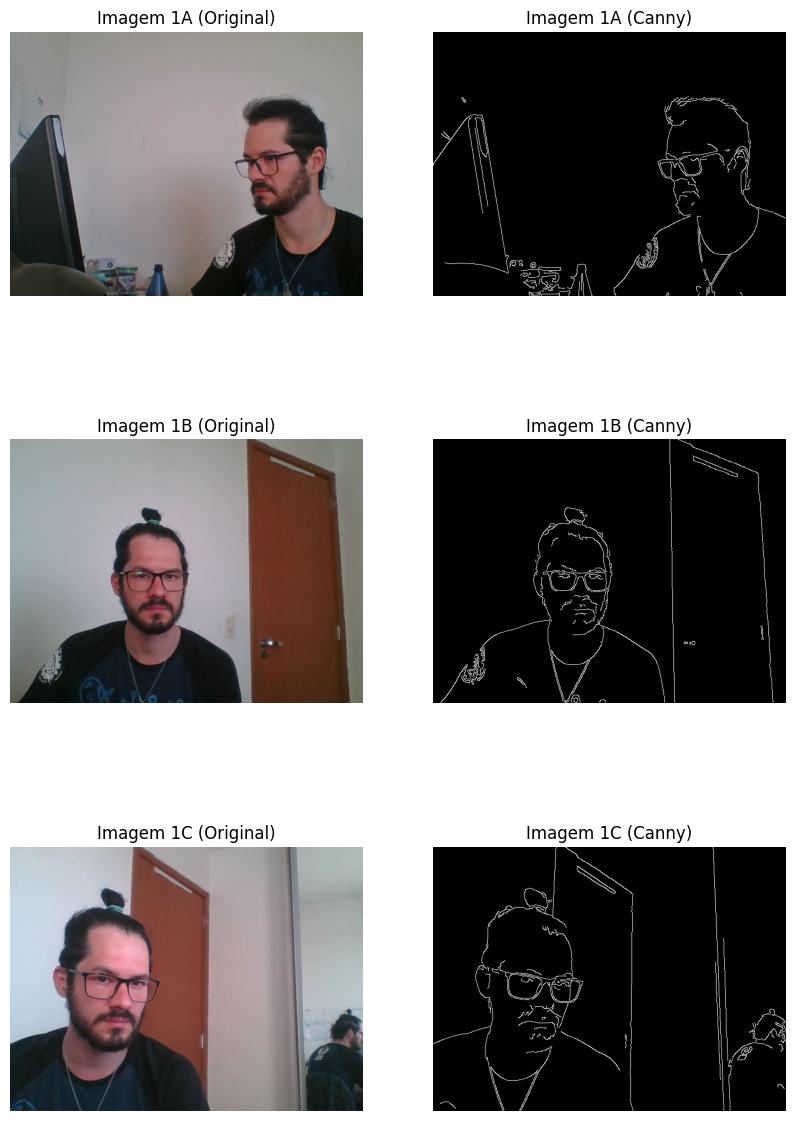

In [5]:
#@title Algoritmo de CANNY
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Carrega as imagens
img1A = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto1.jpeg', 1)
img1B = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto2.jpeg', 1)
img1C = cv.imread('/content/drive/MyDrive/Mestrado/Processamento Digital de Imagens/Módulo 6/foto3.jpeg', 1)

# Exibe a imagem original e o Resultado
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

# Convertendo para tons de cinza
img_gray1A = cv.cvtColor(img1A, cv.COLOR_BGR2GRAY)
img_gray1B = cv.cvtColor(img1B, cv.COLOR_BGR2GRAY)
img_gray1C = cv.cvtColor(img1C, cv.COLOR_BGR2GRAY)

# Exibe as imagens originais
ax[0, 0].imshow(cv.cvtColor(img1A, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("Imagem 1A (Original)")
ax[0, 0].axis('off')

ax[1, 0].imshow(cv.cvtColor(img1B, cv.COLOR_BGR2RGB))
ax[1, 0].set_title("Imagem 1B (Original)")
ax[1, 0].axis('off')

ax[2, 0].imshow(cv.cvtColor(img1C, cv.COLOR_BGR2RGB))
ax[2, 0].set_title("Imagem 1C (Original)")
ax[2, 0].axis('off')

# Técnica de Canny
edges1A = cv.Canny(img_gray1A, 100, 200)
edges1B = cv.Canny(img_gray1B, 100, 200)
edges1C = cv.Canny(img_gray1C, 100, 200)

# Exibe as imagens após a detecção de bordas com o Canny
ax[0, 1].imshow(edges1A, cmap='gray')
ax[0, 1].set_title("Imagem 1A (Canny)")
ax[0, 1].axis('off')

ax[1, 1].imshow(edges1B, cmap='gray')
ax[1, 1].set_title("Imagem 1B (Canny)")
ax[1, 1].axis('off')

ax[2, 1].imshow(edges1C, cmap='gray')
ax[2, 1].set_title("Imagem 1C (Canny)")
ax[2, 1].axis('off')

plt.show()
